<a href="https://colab.research.google.com/github/rsakml/PCVK_Genap_2022/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2 
import numpy as np
from matplotlib import pyplot as plt

Fungsi Dilasi cross 3 x 3 tanpa menggunakan library morphology dari 
openCV

(<Axes: title={'center': 'Citra\xa0Hasil\xa0Dilasi'}>,
 Text(0.5, 1.0, 'Citra\xa0Hasil\xa0Dilasi'))

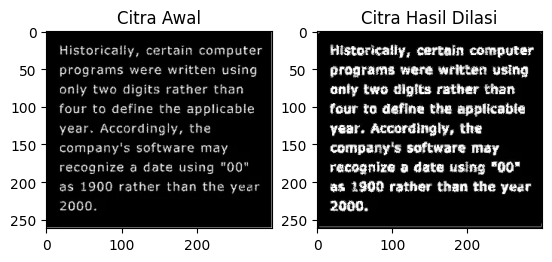

In [14]:
from google.colab.patches import cv2_imshow
img = cv2.imread('/content/drive/MyDrive/Pengolahan Citra/morphology.png')

def dilate(image, kernel):
    height, width = image.shape[:2]
    kernel_h, kernel_w = kernel.shape[:2]
    h_offset, w_offset = kernel_h // 2, kernel_w // 2
    dilated_image = np.zeros((height, width), dtype=np.uint8)
    for y in range(h_offset, height - h_offset):
        for x in range(w_offset, width - w_offset):
            if image[y, x] > 0:
                roi = image[y - h_offset:y + h_offset + 1, x - w_offset:x + w_offset + 1]
                dilation = cv2.bitwise_or(roi, kernel)
                dilated_image[y, x] = np.max(dilation)
    return dilated_image

# Load image
image_gray = cv2.imread('/content/drive/MyDrive/Pengolahan Citra/morphology.png', cv2.IMREAD_GRAYSCALE)

# Create Structuring Element (SED)
kernel = np.zeros((3, 3), dtype=np.uint8)
kernel[1, :] = 1
kernel[:, 1] = 1

# Apply dilate function
dilated_image = dilate(image_gray, kernel)

# Display the original and dilated image
plt.subplot(121),plt.imshow(image_gray, cmap='gray'),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilated_image, cmap='gray'),plt.title('Citra Hasil Dilasi')

Fungsi Dilasi cross 3 x 3 dengan menggunakan library morphology dari openCV

[[0 1 0]
 [1 1 1]
 [0 1 0]]


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

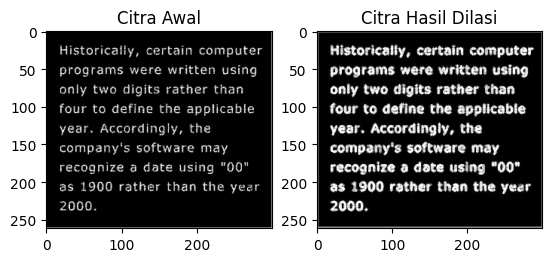

In [16]:
img = cv2.imread('/content/drive/MyDrive/Pengolahan Citra/morphology.png')
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
cross3 = cv2.morphologyEx(img, cv2.MORPH_DILATE, kernel)

print(kernel)
plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(cross3), plt.title('Citra Hasil Dilasi')

Fungsi erosi square 5 x 5 tanpa menggunakan library morphology

<ipython-input-17-adccae0ec306>:19: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(121), plt.imshow(img2, cmap ="gray"), plt.title('Citra Asli')


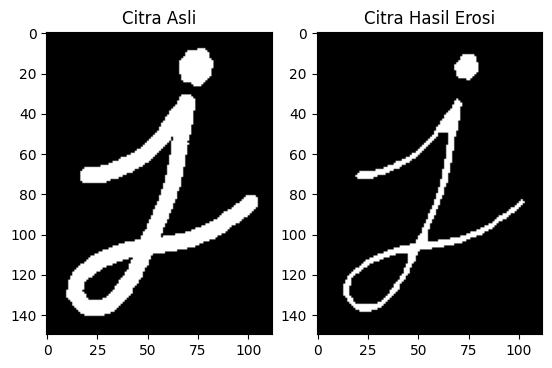

In [17]:
img2= cv2.imread('/content/drive/MyDrive/Pengolahan Citra/j.png', 0)

m,n= img2.shape 

plt.imshow(img2, cmap="gray")

k=5
SE= np.ones((k,k), dtype=np.uint8)
constant= (k-1)//2

imgErode= np.zeros((m,n), dtype=np.uint8)

for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp= img2[i-constant:i+constant+1, j-constant:j+constant+1]
    product= temp*SE
    imgErode[i,j]= np.min(product)

plt.subplot(121), plt.imshow(img2, cmap ="gray"), plt.title('Citra Asli')
plt.subplot(122), plt.imshow(imgErode, cmap="gray"), plt.title('Citra Hasil Erosi')
plt.show()

Fungsi Erosi square 5 x 5 dengan menggunakan library morphology dari openCV

(<Axes: title={'center': 'Citra\xa0Hasil\xa0Erosi'}>,
 Text(0.5, 1.0, 'Citra\xa0Hasil\xa0Erosi'))

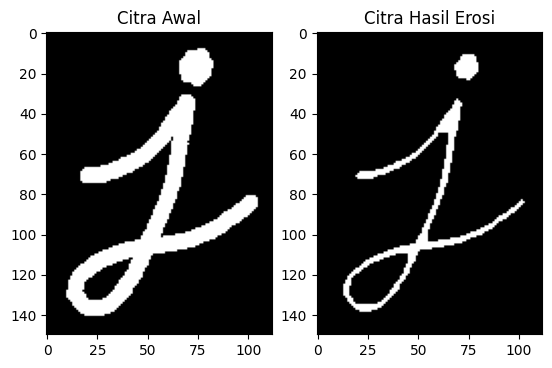

In [19]:
kernel = np.ones((5,5), np.uint8)
erosion = cv2.erode(img2, kernel, iterations = 1)

plt.subplot(121), plt.imshow(img2, cmap="gray"), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')

Fungsi Operasi opening square 3 x 3 tanpa dan dengan menggunakan library morphology

<ipython-input-9-133eb7e6266d>:51: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img3, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra\xa0Hasil\xa0Opening'}>,
 Text(0.5, 1.0, 'Citra\xa0Hasil\xa0Opening'))

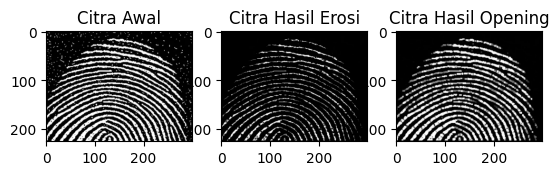

In [9]:
# tanpa menggunakan library morphology dari openCV

# Membaca image untuk operasi erosi
img3 = cv2.imread('/content/drive/MyDrive/Pengolahan Citra/fingerprint.png', 0)

#Acquire size of the image
m, n = img3.shape

#Show the image
plt.imshow(img3, cmap="gray")

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant): #constant adalah tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = img3[i-constant:i+constant+1, j-constant:j+constant+1] #temp digunakan untuk menampung atau menyimpan data untuk sementara
    product = temp * SE
    imgErode[i,j] = np.min(product)

#Read the image for dilation
img3_2 = imgErode

#Acquire size of the image
p, q= img3_2.shape

#Show the image
plt.imshow(img3_2, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element 
SED = np.array([[1,1,1], [1,1,1], [1,1,1]])
constant1 = 1

#Dilation operation without using inbuilt cv2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img3_2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

plt.subplot(131),plt.imshow(img3, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')
plt.subplot(133),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Opening')

(<Axes: title={'center': 'Citra\xa0Hasil\xa0Opening'}>,
 Text(0.5, 1.0, 'Citra\xa0Hasil\xa0Opening'))

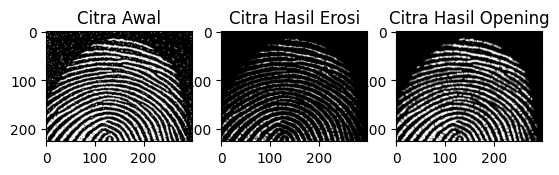

In [6]:
#dengan library

img3= cv2.imread('/content/drive/MyDrive/Pengolahan Citra/fingerprint.png', 0)

kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(img3, cv2.MORPH_OPEN, kernel)
erosion = cv2.erode(img3, kernel, iterations = 1)

plt.subplot(131), plt.imshow(img3, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')
plt.subplot(133), plt.imshow(opening, cmap="gray"), plt.title('Citra Hasil Opening')

Fungsi operasi closing square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV

<ipython-input-3-3a67dc0e30ba>:48: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img3, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra\xa0Hasil\xa0Closing'}>,
 Text(0.5, 1.0, 'Citra\xa0Hasil\xa0Closing'))

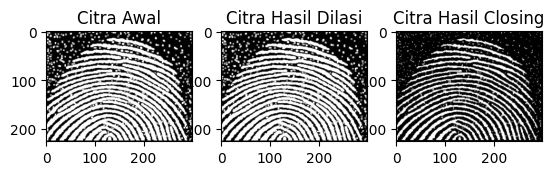

In [3]:
img3 = cv2.imread('/content/drive/MyDrive/Pengolahan Citra/fingerprint.png', 0)

#Acquire size of the image
p, q = img3.shape

#Show the image
plt.imshow(img3, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element 
SED = np.array([[1,1,1], [1,1,1], [1,1,1]])
constant1 = 1

#Dilation operation without using inbuilt CV2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img3[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

#Read the image for erosion
img3 = imgDilate

#Acquire size of the image
m, n= img3.shape 

#Show the image
plt.imshow(img3, cmap="gray")

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant):
  for j in range(constant,n-constant):
    temp = img3[i-constant:i+constant+1, j-constant:j+constant+1]
    product = temp * SE
    imgErode[i,j] = np.min(product)

plt.subplot(131),plt.imshow(img3, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')
plt.subplot(133),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Closing')

(<Axes: title={'center': 'Citra\xa0Hasil\xa0Closing'}>,
 Text(0.5, 1.0, 'Citra\xa0Hasil\xa0Closing'))

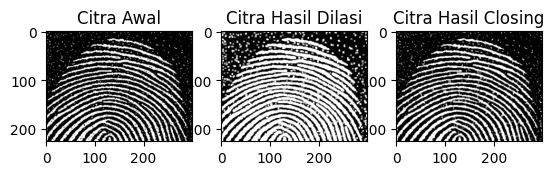

In [8]:
#dengan library
kernel = np.ones((3,3), np.uint8)
dilation = cv2.morphologyEx(img3, cv2.MORPH_DILATE, kernel)
closing = cv2.morphologyEx(img3, cv2.MORPH_CLOSE, kernel)

plt.subplot(131), plt.imshow(img3, cmap="gray"), plt.title('Citra Awal')
plt.subplot(132), plt.imshow(dilation, cmap="gray"), plt.title('Citra Hasil Dilasi')
plt.subplot(133), plt.imshow(closing, cmap="gray"), plt.title('Citra Hasil Closing')

operasi dilasi dengan Structuring Element berbentuk 
Cross 3 x 3 dan 5 x 5,

In [4]:
img4= cv2.imread('/content/drive/MyDrive/Pengolahan Citra/j.png',0)

SED = Cross 3


(<Axes: title={'center': 'Citra\xa0Hasil\xa0Dilasi'}>,
 Text(0.5, 1.0, 'Citra\xa0Hasil\xa0Dilasi'))

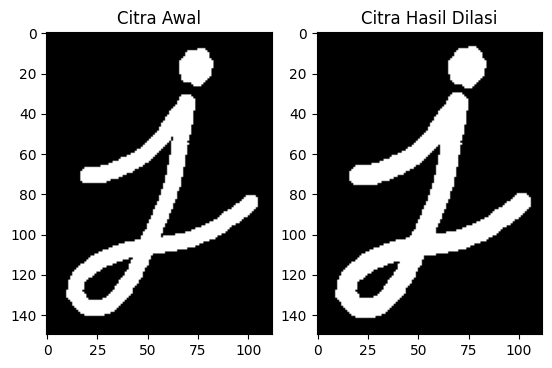

In [19]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3)) 
dilation = cv2.dilate(img4, kernel, iterations = 1)

print("SED = Cross 3")

plt.subplot(121),plt.imshow(img4, cmap="gray"),plt.title('Citra Awal') 
plt.subplot(122),plt.imshow(dilation, cmap="gray"),plt.title('Citra Hasil Dilasi')

SED = Cross 5


(<Axes: title={'center': 'Citra\xa0Hasil\xa0Dilasi'}>,
 Text(0.5, 1.0, 'Citra\xa0Hasil\xa0Dilasi'))

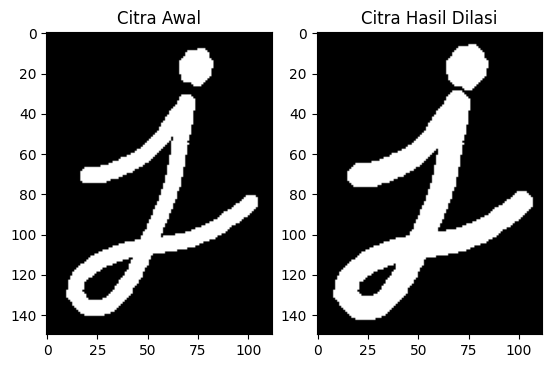

In [20]:
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(5,5)) 
dilation = cv2.dilate(img4, kernel, iterations = 1)

print("SED = Cross 5")

plt.subplot(121),plt.imshow(img4, cmap="gray"),plt.title('Citra Awal') 
plt.subplot(122),plt.imshow(dilation, cmap="gray"),plt.title('Citra Hasil Dilasi')

Operasi dilasi berbentuk 
Circular 3 x 3 dan 5 x 5

SED = Circle 3


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

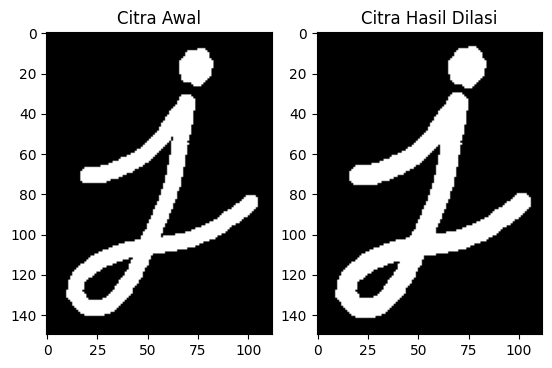

In [5]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)) 
dilation = cv2.dilate(img4, kernel, iterations = 1) 

print("SED = Circle 3")

plt.subplot(121),plt.imshow(img4, cmap="gray"),plt.title('Citra Awal') 
plt.subplot(122),plt.imshow(dilation, cmap="gray"),plt.title('Citra Hasil Dilasi')

SED = Circle 5


(<Axes: title={'center': 'Citra Hasil Dilasi'}>,
 Text(0.5, 1.0, 'Citra Hasil Dilasi'))

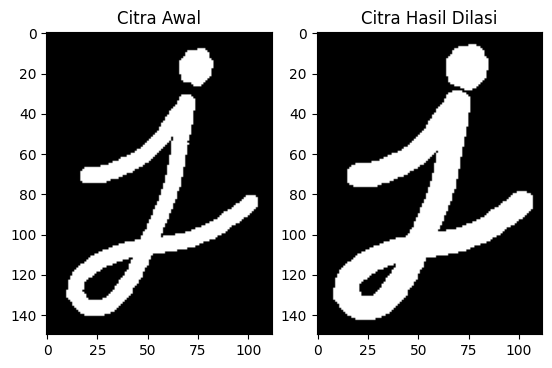

In [6]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) 
dilation = cv2.dilate(img4, kernel, iterations = 1) 

print("SED = Circle 5")

plt.subplot(121),plt.imshow(img4, cmap="gray"),plt.title('Citra Awal') 
plt.subplot(122),plt.imshow(dilation, cmap="gray"),plt.title('Citra Hasil Dilasi')

Operasi erosi berbentuk 
Rectangle 3 x 5 dan 5 x 7

SE = Rectangle 3x5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

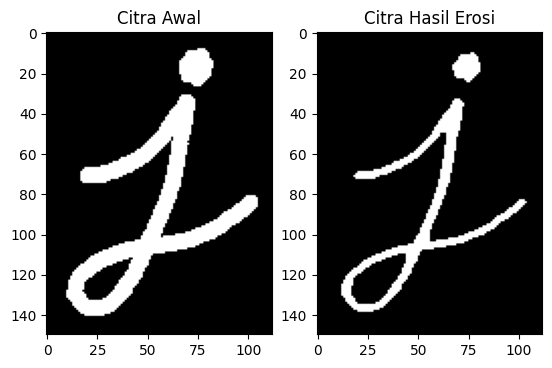

In [7]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(3,5)) 
erosion = cv2.erode(img4, kernel, iterations = 1)

print("SE = Rectangle 3x5")

plt.subplot(121), plt.imshow(img4, cmap="gray"), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')

SE = Rectangle 5x7


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

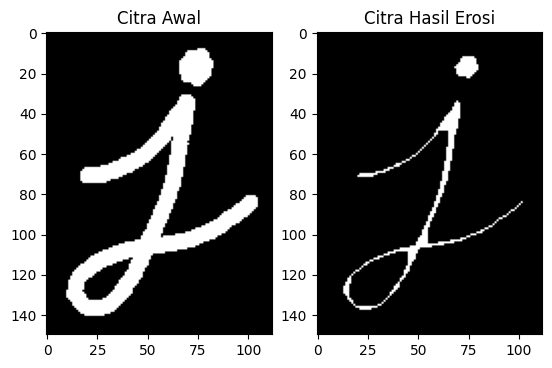

In [8]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(5,7)) 
erosion = cv2.erode(img4, kernel, iterations = 1)

print("SE = Rectangle 5x7")

plt.subplot(121), plt.imshow(img4, cmap="gray"), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')

Operasi erosi berbentuk 
Line Vertikal 3 dan 5

SE = Line Vertikal 3


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

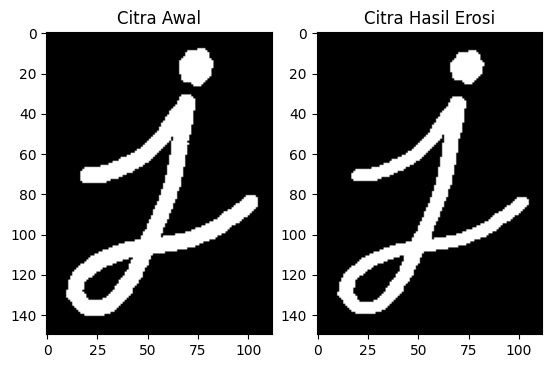

In [9]:
kernel = np.ones((3,1),np.uint8) 
erosion = cv2.morphologyEx(img4, cv2.MORPH_ERODE, kernel)

print("SE = Line Vertikal 3")

plt.subplot(121), plt.imshow(img4, cmap="gray"), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')

SE = Line Vertikal 5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

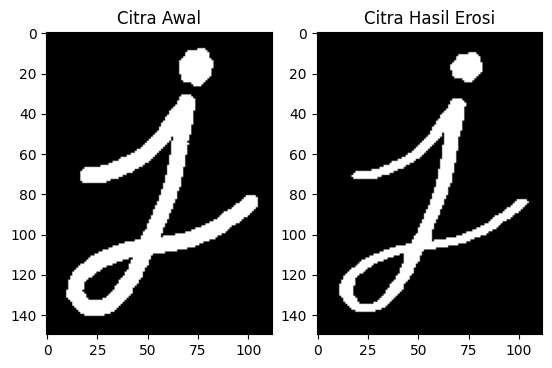

In [10]:
kernel = np.ones((5,1),np.uint8) 
erosion = cv2.morphologyEx(img4, cv2.MORPH_ERODE, kernel)

print("SE = Line Vertikal 5")

plt.subplot(121), plt.imshow(img4, cmap="gray"), plt.title('Citra Awal') 
plt.subplot(122), plt.imshow(erosion, cmap="gray"), plt.title('Citra Hasil Erosi')